In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [4]:
# 2. Load Dataset
# -------------------------------
df = pd.read_csv('/content/malicious_phish.csv')

In [5]:
# 3. Preprocessing
# -------------------------------
# Features (URL text)
X = df['url']

# Target (type)
y = df['type']

# Convert target labels to binary for ROC ✔️
# Let's define "malicious" = phishing + malware + defacement
y_binary = y.apply(lambda x: 0 if x == "benign" else 1)


In [7]:
# 4. Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42
)

In [8]:
# 5. TF-IDF Vectorization
# -------------------------------
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [9]:
# 6. Naive Bayes Model
# -------------------------------
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)


MultinomialNB()

In [12]:
# 7. Predictions
# -------------------------------
y_pred = nb.predict(X_test_vec)
y_prob = nb.predict_proba(X_test_vec)[:, 1]   # probability for ROC


In [13]:
# 8. Evaluation
# -------------------------------
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     85778
           1       0.90      0.79      0.84     44461

    accuracy                           0.90    130239
   macro avg       0.90      0.87      0.88    130239
weighted avg       0.90      0.90      0.90    130239


Confusion Matrix:

[[81663  4115]
 [ 9194 35267]]


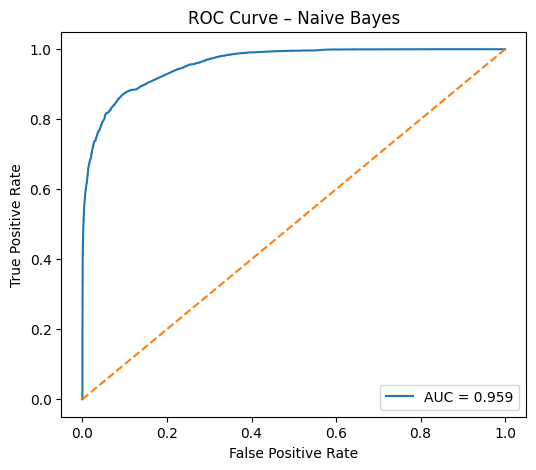

In [14]:
# 9. ROC Curve
# -------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Naive Bayes")
plt.legend(loc="lower right")
plt.show()